<a href="https://colab.research.google.com/github/Dagnm/An-Amharic-News-Text-classification-Dataset/blob/main/mBERT_amharic_news_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is a sample code snippet that I exported from Kaggle.
# I used it there to fine-tune an LLM, and I’m including it here as a reference
# to demonstrate my coding capabilities.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT  KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.


dagnmm_clean_upgrade_amharic_news_dataset_path = kagglehub.dataset_download('dagnmm/clean-upgrade-amharic-news-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-upgrade-amharic-news-dataset/clean_upgrade_amahric_news_dataset.csv


In [ ]:
! pip install  evaluate torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the dataset with the correct encoding
df = pd.read_csv('/kaggle/input/clean-upgrade-amharic-news-dataset/clean_upgrade_amahric_news_dataset.csv', encoding='utf-16', delimiter="\t")

# Inspect the dataset
print(df.head())


                                            headline category        date  \
0           የዩጋንዳ ማዕከላዊ ባንክ በጠላፊዎች 17 ሚሊዮን ዶላር ተመዘበረ     ቢዝነስ  2024-11-29   
1               የህዳር 20 የባንኮች የውጭ ምንዛሬ ተመን ምን ይመስላል?     ቢዝነስ  2024-11-29   
2                  ያገለገሉ የኤሌክትሪክ መኪኖች ዋጋ እየቀነሰ ይሄዳል?     ቢዝነስ  2024-11-28   
3         በህዳር 19 የባንኮች የውጭ ምንዛሬ ተመን የዶላር ዋጋ ስንት ገባ?     ቢዝነስ  2024-11-28   
4  ግዙፉ የሩሲያ የኒውክሌር ኩባንያ ከኢትዮጵያ መንግስት ጋር ስምምነት መፈጸ...     ቢዝነስ  2024-11-27   

   views                                            article  \
0    NaN  ፕሬዝዳንት ዮሪ ሙሴቪኒ ምዝበራው እንዲመረመር አዘዋል የዩጋንዳ ማዕከላዊ ...   
1    NaN  የኢትዮጵያ ንግድ ባንክ አንድ ዶላርን በ122.5986 ብር እየገዛ በ125...   
2    NaN  ላገለገሉ የኤሌክትሪክ መኪኖች የወደፊት ትልቁ ስጋት ምንድን ነው? ያገለገ...   
3    NaN  የግል ንግድ ባንኮች ለአንድ ዶላር ከ122 እስከ 124 ብር መግዣ ከ124...   
4    NaN  በስምምነቱ መሰረት ለሰላማዊ አላማ የሚውሉ የሀይል አማራጮችን ለማስተዋወቅ...   

                                                link  
0  https://am.al-ain.com/article/bank-of-uganda-a...  
1  https://am.al-ain.com/article/exchange-rate-e

In [ ]:
import re

def clean_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return ''  # Return an empty string if the input is not a valid string

    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    # text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Clean both the headline and article columns
df['headline_clean'] = df['headline'].apply(clean_text)
df['article_clean'] = df['article'].apply(clean_text)

# Verify the cleaning process
print(df[['headline', 'headline_clean', 'article', 'article_clean']].head())


                                            headline  \
0           የዩጋንዳ ማዕከላዊ ባንክ በጠላፊዎች 17 ሚሊዮን ዶላር ተመዘበረ   
1               የህዳር 20 የባንኮች የውጭ ምንዛሬ ተመን ምን ይመስላል?   
2                  ያገለገሉ የኤሌክትሪክ መኪኖች ዋጋ እየቀነሰ ይሄዳል?   
3         በህዳር 19 የባንኮች የውጭ ምንዛሬ ተመን የዶላር ዋጋ ስንት ገባ?   
4  ግዙፉ የሩሲያ የኒውክሌር ኩባንያ ከኢትዮጵያ መንግስት ጋር ስምምነት መፈጸ...   

                                      headline_clean  \
0           የዩጋንዳ ማዕከላዊ ባንክ በጠላፊዎች 17 ሚሊዮን ዶላር ተመዘበረ   
1               የህዳር 20 የባንኮች የውጭ ምንዛሬ ተመን ምን ይመስላል?   
2                  ያገለገሉ የኤሌክትሪክ መኪኖች ዋጋ እየቀነሰ ይሄዳል?   
3         በህዳር 19 የባንኮች የውጭ ምንዛሬ ተመን የዶላር ዋጋ ስንት ገባ?   
4  ግዙፉ የሩሲያ የኒውክሌር ኩባንያ ከኢትዮጵያ መንግስት ጋር ስምምነት መፈጸ...   

                                             article  \
0  ፕሬዝዳንት ዮሪ ሙሴቪኒ ምዝበራው እንዲመረመር አዘዋል የዩጋንዳ ማዕከላዊ ...   
1  የኢትዮጵያ ንግድ ባንክ አንድ ዶላርን በ122.5986 ብር እየገዛ በ125...   
2  ላገለገሉ የኤሌክትሪክ መኪኖች የወደፊት ትልቁ ስጋት ምንድን ነው? ያገለገ...   
3  የግል ንግድ ባንኮች ለአንድ ዶላር ከ122 እስከ 124 ብር መግዣ ከ124...   
4  በስምምነቱ መሰረት ለሰላማዊ አላማ የሚውሉ የሀይል አማራጮችን ለማስተ

In [ ]:
from sklearn.model_selection import train_test_split

# Optionally combine headline and article into a single text (if preferred)
df['text'] = df['headline_clean'] + " " + df['article_clean']

# Splitting dataset into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['category'], random_state=42)

# Verify the split
print(f"Train size: {len(train_df)}")
print(f"Test size: {len(test_df)}")



Train size: 115360
Test size: 28841


In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import Dataset

# Load  tokenizer
checkpoint="bert-base-multilingual-cased"

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(examples):
    """Tokenizes a batch of examples."""
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)

# Convert DataFrame to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize the train and test sets
train_encodings = train_dataset.map(tokenize_function, batched=True)
test_encodings = test_dataset.map(tokenize_function, batched=True)

# Inspect the first row of tokenized output
first_encoding = train_encodings[0]
print(f"Input Text:\n{train_df['text'].iloc[0]}\n")
print(f"Input IDs:\n{first_encoding['input_ids']}\n")
print(f"Attention Mask:\n{first_encoding['attention_mask']}\n")

# Create DataCollator (optional for training)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors='pt')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Map:   0%|          | 0/115360 [00:00<?, ? examples/s]

Map:   0%|          | 0/28841 [00:00<?, ? examples/s]

Input Text:
የአቃቂ ቃሊቲ ክፍለ ከተማ መሬት አስተዳደር ሦስት ሠራተኞች ተከሰሱ በአዲስ አበባ ከተማ አስተዳደር አቃቂ ቃሊቲ ክፍለ ከተማ ቀበሌ 10 ውስጥ የሚገኝ በ413 ካሬ ሜትር ቦታ ላይ ያረፈ ባለ አምስት ፎቅ ሕንፃ ላይ የተሰጠ ውክልና የተሻረና በክፍለ ከተማው ተመዝገቦ እያለ፣ የተሰጠው ሕጋዊ ውክልና እንዳልተነሳ አስመስለው ለባንክ ማረጋገጫ በመስጠት ጉዳት አድርሰዋል የተባሉ ሦስት የክፍለ ከተማው የመሬት ልማት ማኔጅመንት ጽሕፈት ቤት ሠራተኞች ተከሰሱ፡፡ሠራተኞቹ የይዞታ አስተዳደር ኦፊሰር አቶ ዘካርያስ ኃይሉ፣ የሰነዶች ማረጋገጫ ኦፊሰሮች ገነት ጤናውና ምናሴ ዮሐንስ ሲሆኑ፣ የወንጀል ድርጊቱ እንዲፈጸም አድርገዋል የተባሉት ንግሥት ተሾመ የተባሉ ግለሰብም በክሱ ተካተዋል፡፡በግል ሥራ ተሰማርተዋል የተባሉት ንግሥት ተሾመ በክፍለ ከተማው በ413 ካሬ ሜትር ቦታ ላይ ያረፈ የአገልግሎት ድርጅት ባለ አምስት ፎቅ ሕንፃ፣ በእሳቸውና በአቶ ገብረ ማርያም ፍታዊ የተመዘገበ ሲሆን፣ ሕንፃውን ለማስተዳደር ንግሥት ተሾመ በሰነዶች ማረጋገጫ ውክልና መውሰዳቸውን ዓቃቤ ሕግ የመሠረተው ክስ ያስረዳል፡፡ነገር ግን አቶ ገብረ ማርያም የሰጡትን ውክልና በማንሳት ለጽሕፈት ቤቱ ያሳወቁ ቢሆንም፣ የንግሥት ተሾመ የጋራ ንብረት የሆነውን ንብረት በባንክ ዕዳ ማስከበሪያነት እንዲታገድላቸው በተሻረ ውክልና ሲጠይቁ፣ ሦስቱም የክፍለ ከተማው መሬት ልማት ጽሕፈት ቤት ሠራተኞች ተቀብለው ማስተናገዳቸውን ክሱ ያስረዳል፡፡ ሠራተኞቹ ሕንፃው በተቋሙ በኩል የተመዘገበ መሆኑን ለብርሃን ኢንተርናሽናል ባንክ ገልጸው በመጻፋቸው፣ ግለሰቧ 5,206,790 ብር ብድር እንዲያገኙ ማድረጋቸውን ዓቃቤ ሕግ በክሱ አብራርቶ ጽፏል፡፡ በመሆኑም ግለሰቧ ያላግባብ ከባንኩ ብድር እንዲያገኙ በማድረጋቸው የወንጀል 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(train_df['category'])

# Convert train and test sets into Hugging Face Dataset format
train_dataset = Dataset.from_dict({
    'input_ids': [example['input_ids'] for example in train_encodings],
    'attention_mask': [example['attention_mask'] for example in train_encodings],
    'label': [label_encoder.transform([label])[0] for label in train_df['category']]
})

test_dataset = Dataset.from_dict({
    'input_ids': [example['input_ids'] for example in test_encodings],
    'attention_mask': [example['attention_mask'] for example in test_encodings],
    'label': [label_encoder.transform([label])[0] for label in test_df['category']]
})

# Print the datasets to verify
print(train_dataset)
print(test_dataset)

Dataset({
    features: ['input_ids', 'attention_mask', 'label'],
    num_rows: 115360
})
Dataset({
    features: ['input_ids', 'attention_mask', 'label'],
    num_rows: 28841
})


In [ ]:
from transformers import AutoModelForSequenceClassification



categories=['ሀገር አቀፍ ዜና', 'መዝናኛ', 'ስፖርት', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', 'ፖለቲካ']
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(categories),  # Number of classification labels
    id2label={i: lbl for i, lbl in enumerate(categories)},  # Map IDs to labels
    label2id={lbl: i for i, lbl in enumerate(categories)},  # Map labels to IDs
    device_map="cuda"  # Automatically maps the model to available GPUs
)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments
import evaluate
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def compute_metrics(p):
    preds = p.predictions.argmax(axis=-1)
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')  # Use 'macro' or 'weighted'
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

batch_size = 8
gradient_accumulation_steps = 4
epochs = 5

training_args = TrainingArguments(
    output_dir=checkpoint+"-finetuned",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    num_train_epochs=epochs,
    weight_decay=0.1,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    fp16=True,
    seed=42,
)


from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_183/827262634.py:44: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ct

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.436300,1.455436,0.436843,0.190832,0.436843,0.265627
2,1.475500,1.481383,0.436843,0.190832,0.436843,0.265627
3,1.480400,1.478159,0.436843,0.190832,0.436843,0.265627
4,1.462100,1.366290,0.495232,0.302727,0.495232,0.375740
5,1.323000,1.303573,0.511113,0.347346,0.511113,0.384902


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

TrainOutput(global_step=18025, training_loss=1.4354802357836338, metrics={'train_runtime': 32298.7391, 'train_samples_per_second': 17.858, 'train_steps_per_second': 0.558, 'total_flos': 1.517679071870976e+17, 'train_loss': 1.4354802357836338, 'epoch': 5.0})

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif


Classification Report:
               precision    recall  f1-score   support

  ሀገር አቀፍ ዜና       0.48      0.98      0.64     12599
        መዝናኛ       0.00      0.00      0.00       228
        ስፖርት       0.79      0.48      0.60      5046
        ቢዝነስ       0.00      0.00      0.00      3334
  ዓለም አቀፍ ዜና       0.00      0.00      0.00      2669
        ፖለቲካ       0.00      0.00      0.00      4965

    accuracy                           0.51     28841
   macro avg       0.21      0.24      0.21     28841
weighted avg       0.35      0.51      0.38     28841



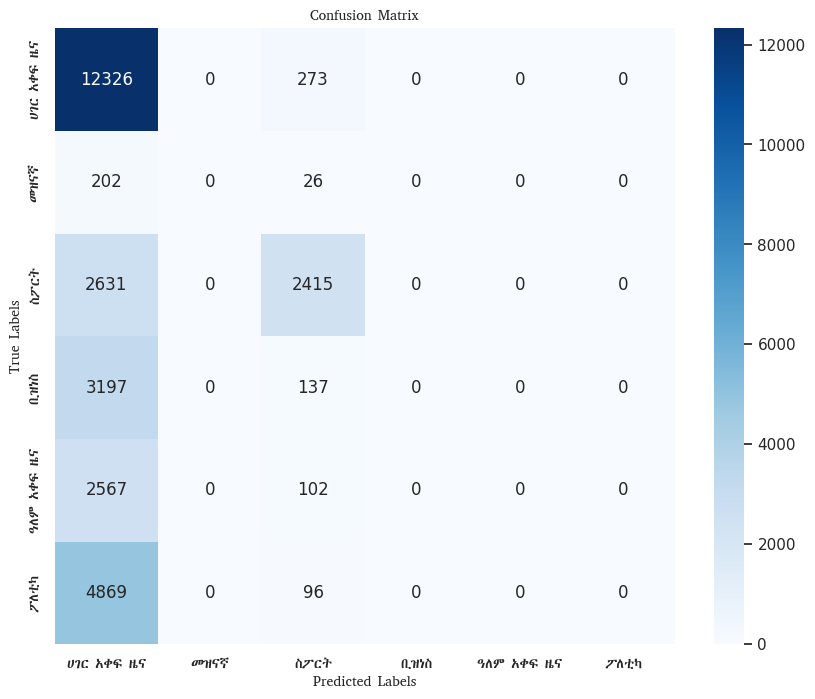

('/kaggle/working/mBERT_base_8_amharic_news_classifier/tokenizer_config.json',
 '/kaggle/working/mBERT_base_8_amharic_news_classifier/special_tokens_map.json',
 '/kaggle/working/mBERT_base_8_amharic_news_classifier/vocab.txt',
 '/kaggle/working/mBERT_base_8_amharic_news_classifier/added_tokens.json',
 '/kaggle/working/mBERT_base_8_amharic_news_classifier/tokenizer.json')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import requests
from transformers import Trainer  # Ensure Trainer is properly imported

# Dynamically download Abyssinica SIL font from Google Fonts
font_url = "https://github.com/google/fonts/raw/main/ofl/abyssinicasil/AbyssinicaSIL-Regular.ttf"
font_path = "/kaggle/working/AbyssinicaSIL-Regular.ttf"

# Download the font
response = requests.get(font_url)
with open(font_path, "wb") as font_file:
    font_file.write(response.content)

# Load the Amharic font
amharic_font = font_manager.FontProperties(fname=font_path)

# Predictions
predictions_output = trainer.predict(test_dataset)

# Extract logits and labels
logits = predictions_output.predictions
true_labels = np.array(test_dataset['label'])

# Convert logits to predicted classes
predicted_classes = np.argmax(logits, axis=1)

# Classification Report
print("\nClassification Report:\n", classification_report(true_labels, predicted_classes, target_names=categories))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.set(font=amharic_font.get_name())  # Use the loaded Amharic font
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Labels", fontproperties=amharic_font)
plt.ylabel("True Labels", fontproperties=amharic_font)
plt.title("Confusion Matrix", fontproperties=amharic_font)
plt.xticks(fontproperties=amharic_font)
plt.yticks(fontproperties=amharic_font)
plt.show()

# Save the model and tokenizer
model_save_path = '/kaggle/working/mBERT_base_8_amharic_news_classifier'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)